<h1 align=center><font size = 5>Hierarchical Clustering Analysis of Credit Card Customers</font></h1>

<img src="https://image.cnbcfm.com/api/v1/image/103951797-GettyImages-532419122.jpg?v=1530195940&w=1920&h=1080" height=500 width=1000 alt="https://www.cnbc.com/2017/05/18/5-questions-to-ask-when-choosing-a-credit-card.html">

<small>Picture Source: <a href="https://www.cnbc.com/2017/05/18/5-questions-to-ask-when-choosing-a-credit-card.html">CNBC</a></small>

<br>

## Summary  

Welcome to the Clus-Hierarchical-Credit-Card project! This project focuses on applying hierarchical clustering analysis to a Credit Card customers dataset to uncover valuable insights and customer segments based on their credit card usage patterns, spending behaviors, and demographics.

<br>

In summary, this project focuses on applying hierarchical clustering techniques to the Credit Card customers dataset to uncover customer segments with similar attributes and behaviors. By leveraging the insights gained from this analysis, businesses can make informed decisions to enhance their services, refine their marketing strategies, and provide a more personalized experience to their credit card customers.  

<br>

## Introduction

In today's data-driven world, understanding customer behavior and preferences is essential for businesses to thrive. The Credit Card customers dataset, available on Kaggle, offers valuable insights into the characteristics, spending patterns, and credit card usage of customers. Analyzing this dataset using hierarchical clustering techniques can provide valuable segmentation and customer profiling, enabling businesses to tailor their strategies and services to specific customer segments.

<br>

The Credit Card customers dataset captures a wide range of features, including customer *demographics*, *credit card attributes*, and *transactional data*. By leveraging this rich dataset, we can uncover hidden structures and patterns within the customer base, leading to a deeper understanding of customer segments, preferences, and needs.
*Hierarchical clustering* is a powerful technique for grouping similar customers based on their attributes and behaviors. It constructs a hierarchical structure, known as a *dendrogram*, that reveals clusters at different levels of similarity. By utilizing a hierarchical approach, **we can identify meaningful customer segments that share common characteristics, enabling businesses to develop targeted marketing campaigns, improve customer experiences, and optimize their business strategies.**

<br>

Throughout this analysis, we will perform data preprocessing steps, such as handling missing values, encoding categorical variables, and scaling numerical features. Next, we will apply hierarchical clustering algorithms to the prepared dataset, enabling us to uncover distinct customer segments based on similarities in their credit card usage patterns, spending behaviors, and demographics. By conducting hierarchical clustering on the Credit Card customers dataset, we aim to provide actionable insights to businesses in the credit card industry. The identified customer segments can assist in customer retention, acquisition strategies, personalized marketing campaigns, and the development of tailored credit card offerings. Understanding the unique needs and preferences of different customer segments can help businesses enhance customer satisfaction, increase customer loyalty, and drive business growth.

## Summary

In summary, this project focuses on applying hierarchical clustering techniques to the Credit Card customers dataset to uncover customer segments with similar attributes and behaviors. By leveraging the insights gained from this analysis, businesses can make informed decisions to enhance their services, refine their marketing strategies, and provide a more personalized experience to their credit card customers.

<br>

<h2>Keywords</h2>

<ul>
	<li>Hierarchical Clustering</li>
	<li>Credit Card</li>
	<li>Clustering</li>
	<li>Customer Segmentation</li>
	<li>Customer Patterns & Analysis</li>
</ul>

<br>

<h1>Objective for this Notebook</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<div class="alert alert-block alert-info" style="margin-top: 20px">
  <ol>
      <li><a href="https://#importing_libraries">Importing Libraries</a></li>
      <li><a href="https://#data_preprocessing">Data Preprocessing</a></li>  
      <li><a href="https://#data_cleaning">Data Cleaning</a></li>
      <li><a href="https://#clustering_using_scipy">Clustering Using SciPy</a></li>
      <li><a href="https://#clustering_using_skl">Clustering using Scikit-learn</a></li>
  </ol>
</div>
<br>

<p></p>
Estimated Time Needed: <strong>20 min</strong>
</div>


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Data Preprocessing

### Download data

[The Credit Card customers dataset](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers), which is essential for conducting hierarchical clustering analysis, can be obtained from the Kaggle platform. Kaggle is a well-known online community and data science platform that provides a wide range of datasets for various analytical tasks. To access the Credit Card customers dataset, visit the Kaggle website and navigate to the dataset's page. The dataset, created by a user named sakshigoyal7, is publicly available for download. On the dataset page, click on the **Download** button to initiate the download process. Once the download is complete, you will have a local copy of the Credit Card customers dataset on your device.

<br>

The dataset contains valuable information related to customer demographics, credit card attributes, and transactional data. It serves as a comprehensive resource for analyzing customer behavior, identifying customer segments, and making data-driven decisions to optimize business strategies in the credit card industry.

<br>

By obtaining the Credit Card customers dataset from Kaggle, you gain access to a rich collection of data that can be leveraged to uncover patterns, segment customers, and gain insights into credit card usage behaviors. This dataset provides an opportunity to delve into the world of customer profiling and segmentation, enabling businesses to refine their offerings, develop targeted marketing campaigns, and enhance customer satisfaction.


In [2]:
!unzip -q /content/archive.zip

### Read data

Let's read dataset to see what features the manufacturer has collected about the existing models.


In [3]:
filename = '/content/BankChurners.csv'

Before using the data, we should inspect it. You can see performs the data exploration and preprocessing on the below.

In [4]:
df = pd.read_csv(filename)
df = df.iloc[:, :-2]
print("Shape of dataset: ", df.shape)

Shape of dataset:  (10127, 21)


We don't need CLIENTNUM which is client number. We can drop it.

In [5]:
df = df.drop('CLIENTNUM', axis=1)

In [6]:
df.head(10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   
5  Existing Customer            44      M                2        Graduate   
6  Existing Customer            51      M                4         Unknown   
7  Existing Customer            32      M                0     High School   
8  Existing Customer            37      M                3      Uneducated   
9  Existing Customer            48      M                2        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   
5        Married     $40K - $60K          Blue              36   
6        Married         $120K +          Gold              46   
7        Unknown     $60K - $80K        Silver              27   
8         Single     $60K - $80K          Blue              36   
9         Single    $80K - $120K          Blue              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   
5                         3                       1                      2   
6                         6                       1                      3   
7                         2                       2                      2   
8                         5                       2                      0   
9                         6                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   
6       34516.0                 2264          32252.0                 1.975   
7       29081.0                 1396          27685.0                 2.204   
8       22352.0                 2517          19835.0                 3.355   
9       11656.0                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36         

In [7]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Check the count of missing values in each column.

In [8]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Compute summary statistics for numerical columns.

In [9]:
df.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

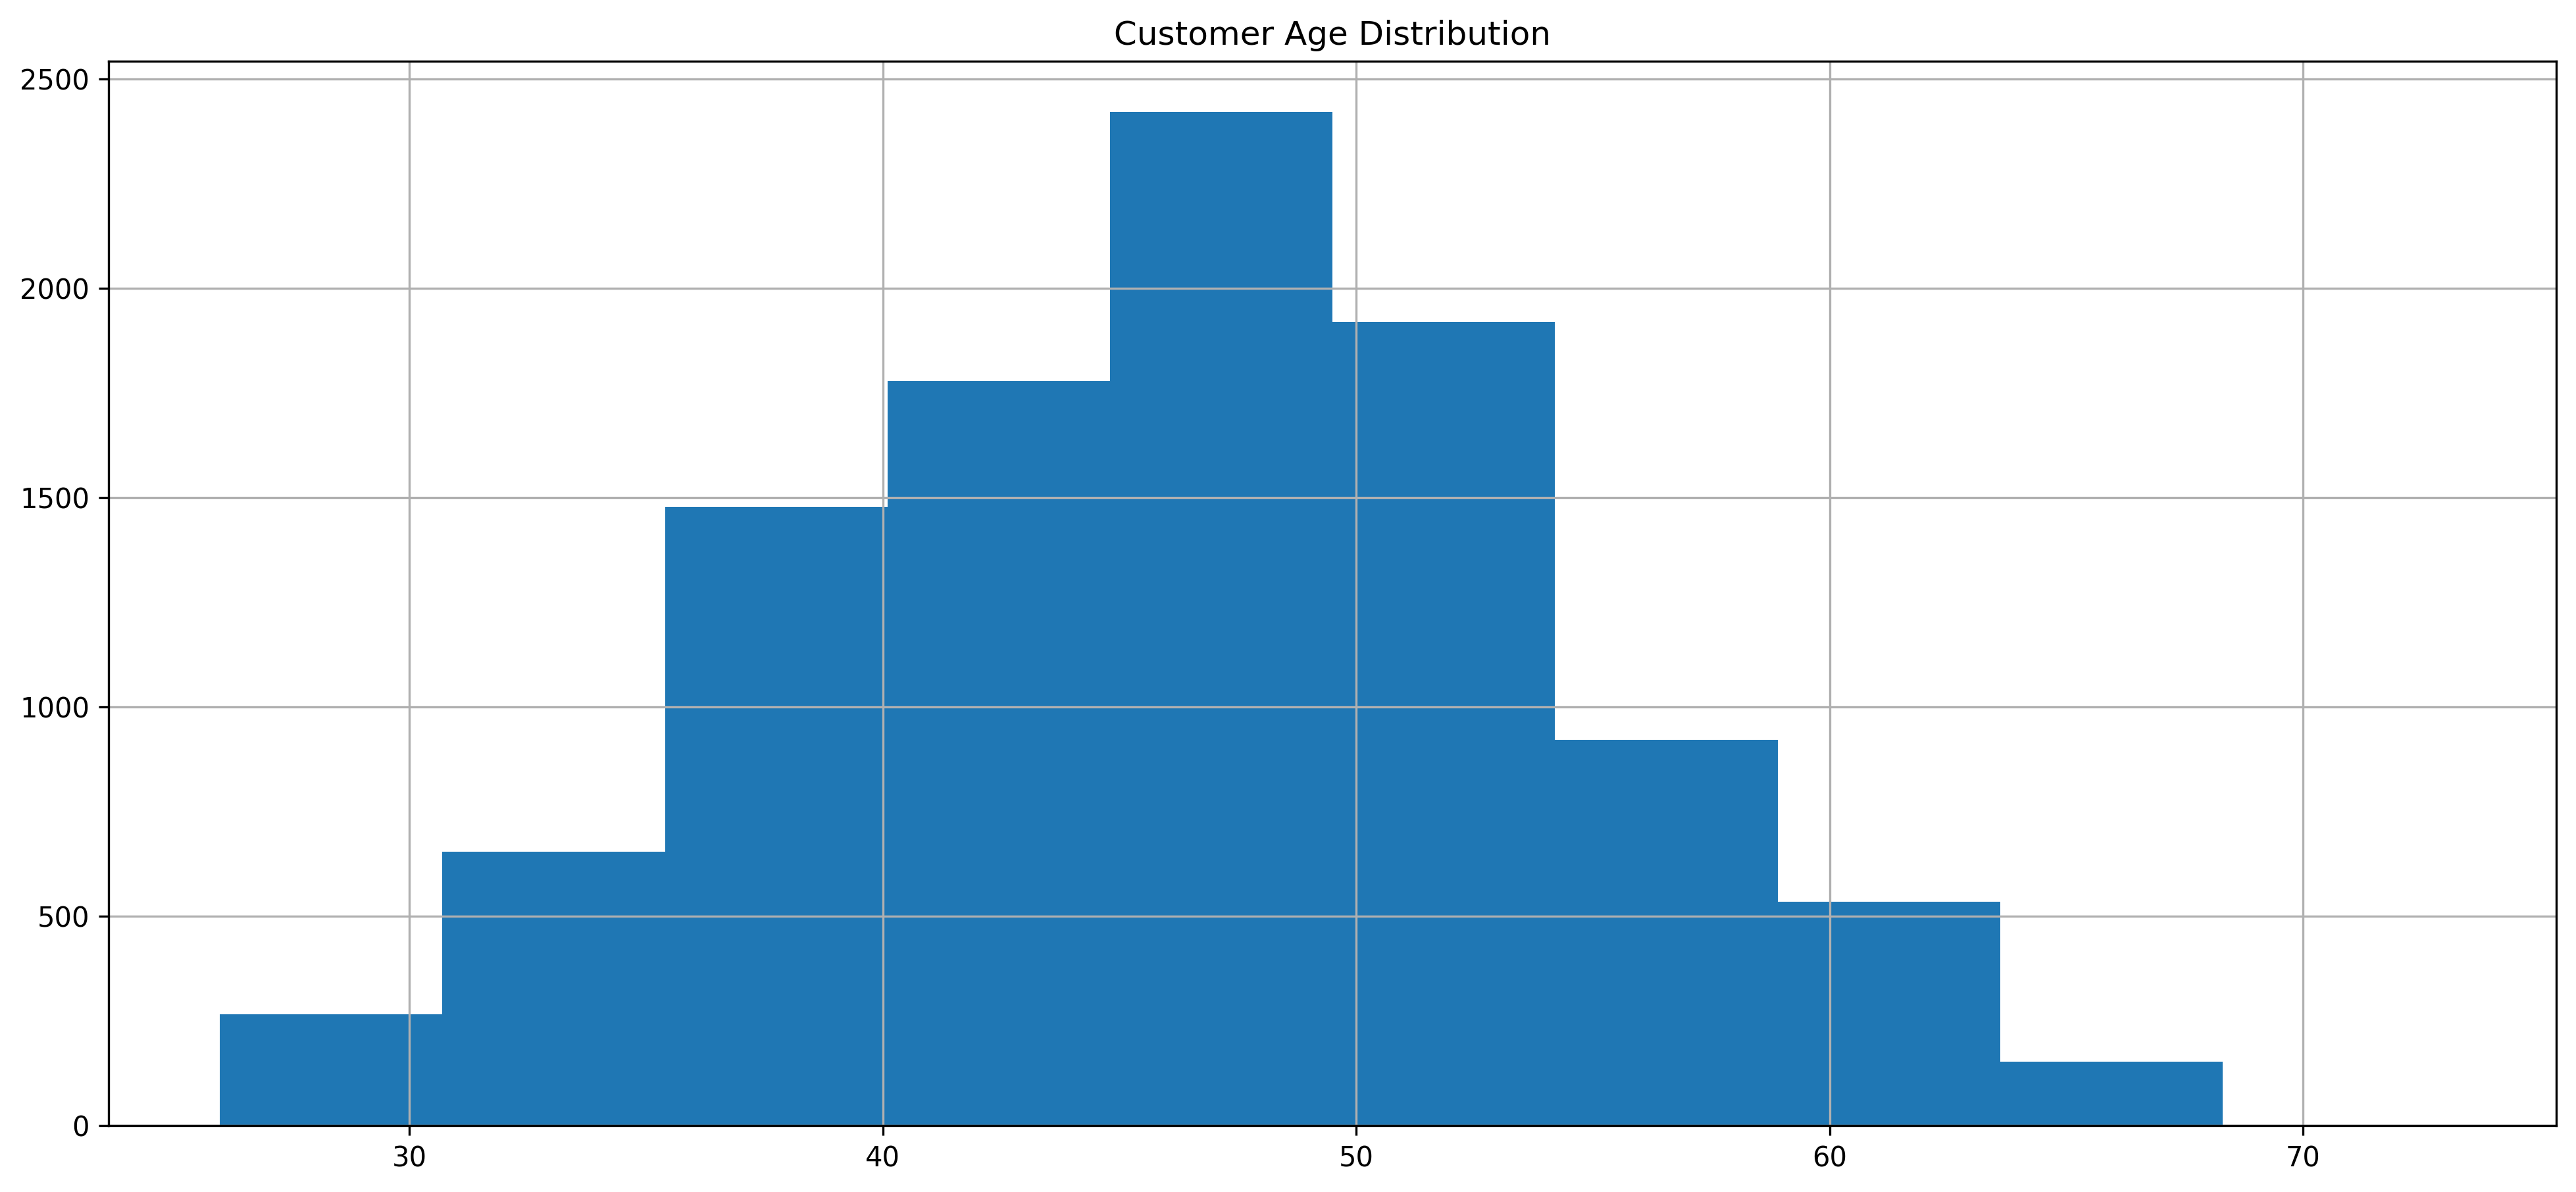

In [10]:
plt.figure(figsize=(16, 7), dpi=300)
plt.title('Customer Age Distribution')
df['Customer_Age'].hist()
plt.show()

## Hierarchical Clustering - Agglomerative

Hierarchical clustering, specifically the agglomerative approach, is a type of clustering algorithm used to group similar objects or data points based on their pairwise similarities or distances. It is a bottom-up clustering technique that starts with each data point as an individual cluster and iteratively merges clusters until a termination condition is met. We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach.<br>


### Feature selection

Let's select our feature set:


In [11]:
featureset = df[['Credit_Limit', 'Avg_Open_To_Buy', 'Customer_Age', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Months_on_book']]

The feature sets include:


1.   Credit Limit on the Credit Card (**Credit_Limit**).
2.   Open to Buy Credit Line (Average of last 12 months) (**Avg_Open_To_Buy**).
3.   Demographic variable - Customer's Age in Years (**Customer_Age**).
4.   Total no. of products held by the customer (**Total_Relationship_Count**).
5.   No. of months inactive in the last 12 months (**Months_Inactive_12_mon**).
6.   Period of relationship with bank (**Months_on_book**).

### Normalization

Now we can normalize the feature set. **MinMaxScaler** transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.


In [12]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)

In [13]:
feature_mtx[0:5]

array([[0.34018992, 0.34511633, 0.40425532, 0.8       , 0.16666667,
        0.60465116],
       [0.20611167, 0.21409324, 0.4893617 , 1.        , 0.16666667,
        0.72093023],
       [0.05984999, 0.09894822, 0.53191489, 0.6       , 0.16666667,
        0.53488372],
       [0.05667565, 0.02297685, 0.29787234, 0.4       , 0.66666667,
        0.48837209],
       [0.09909093, 0.13655724, 0.29787234, 0.8       , 0.16666667,
        0.18604651]])

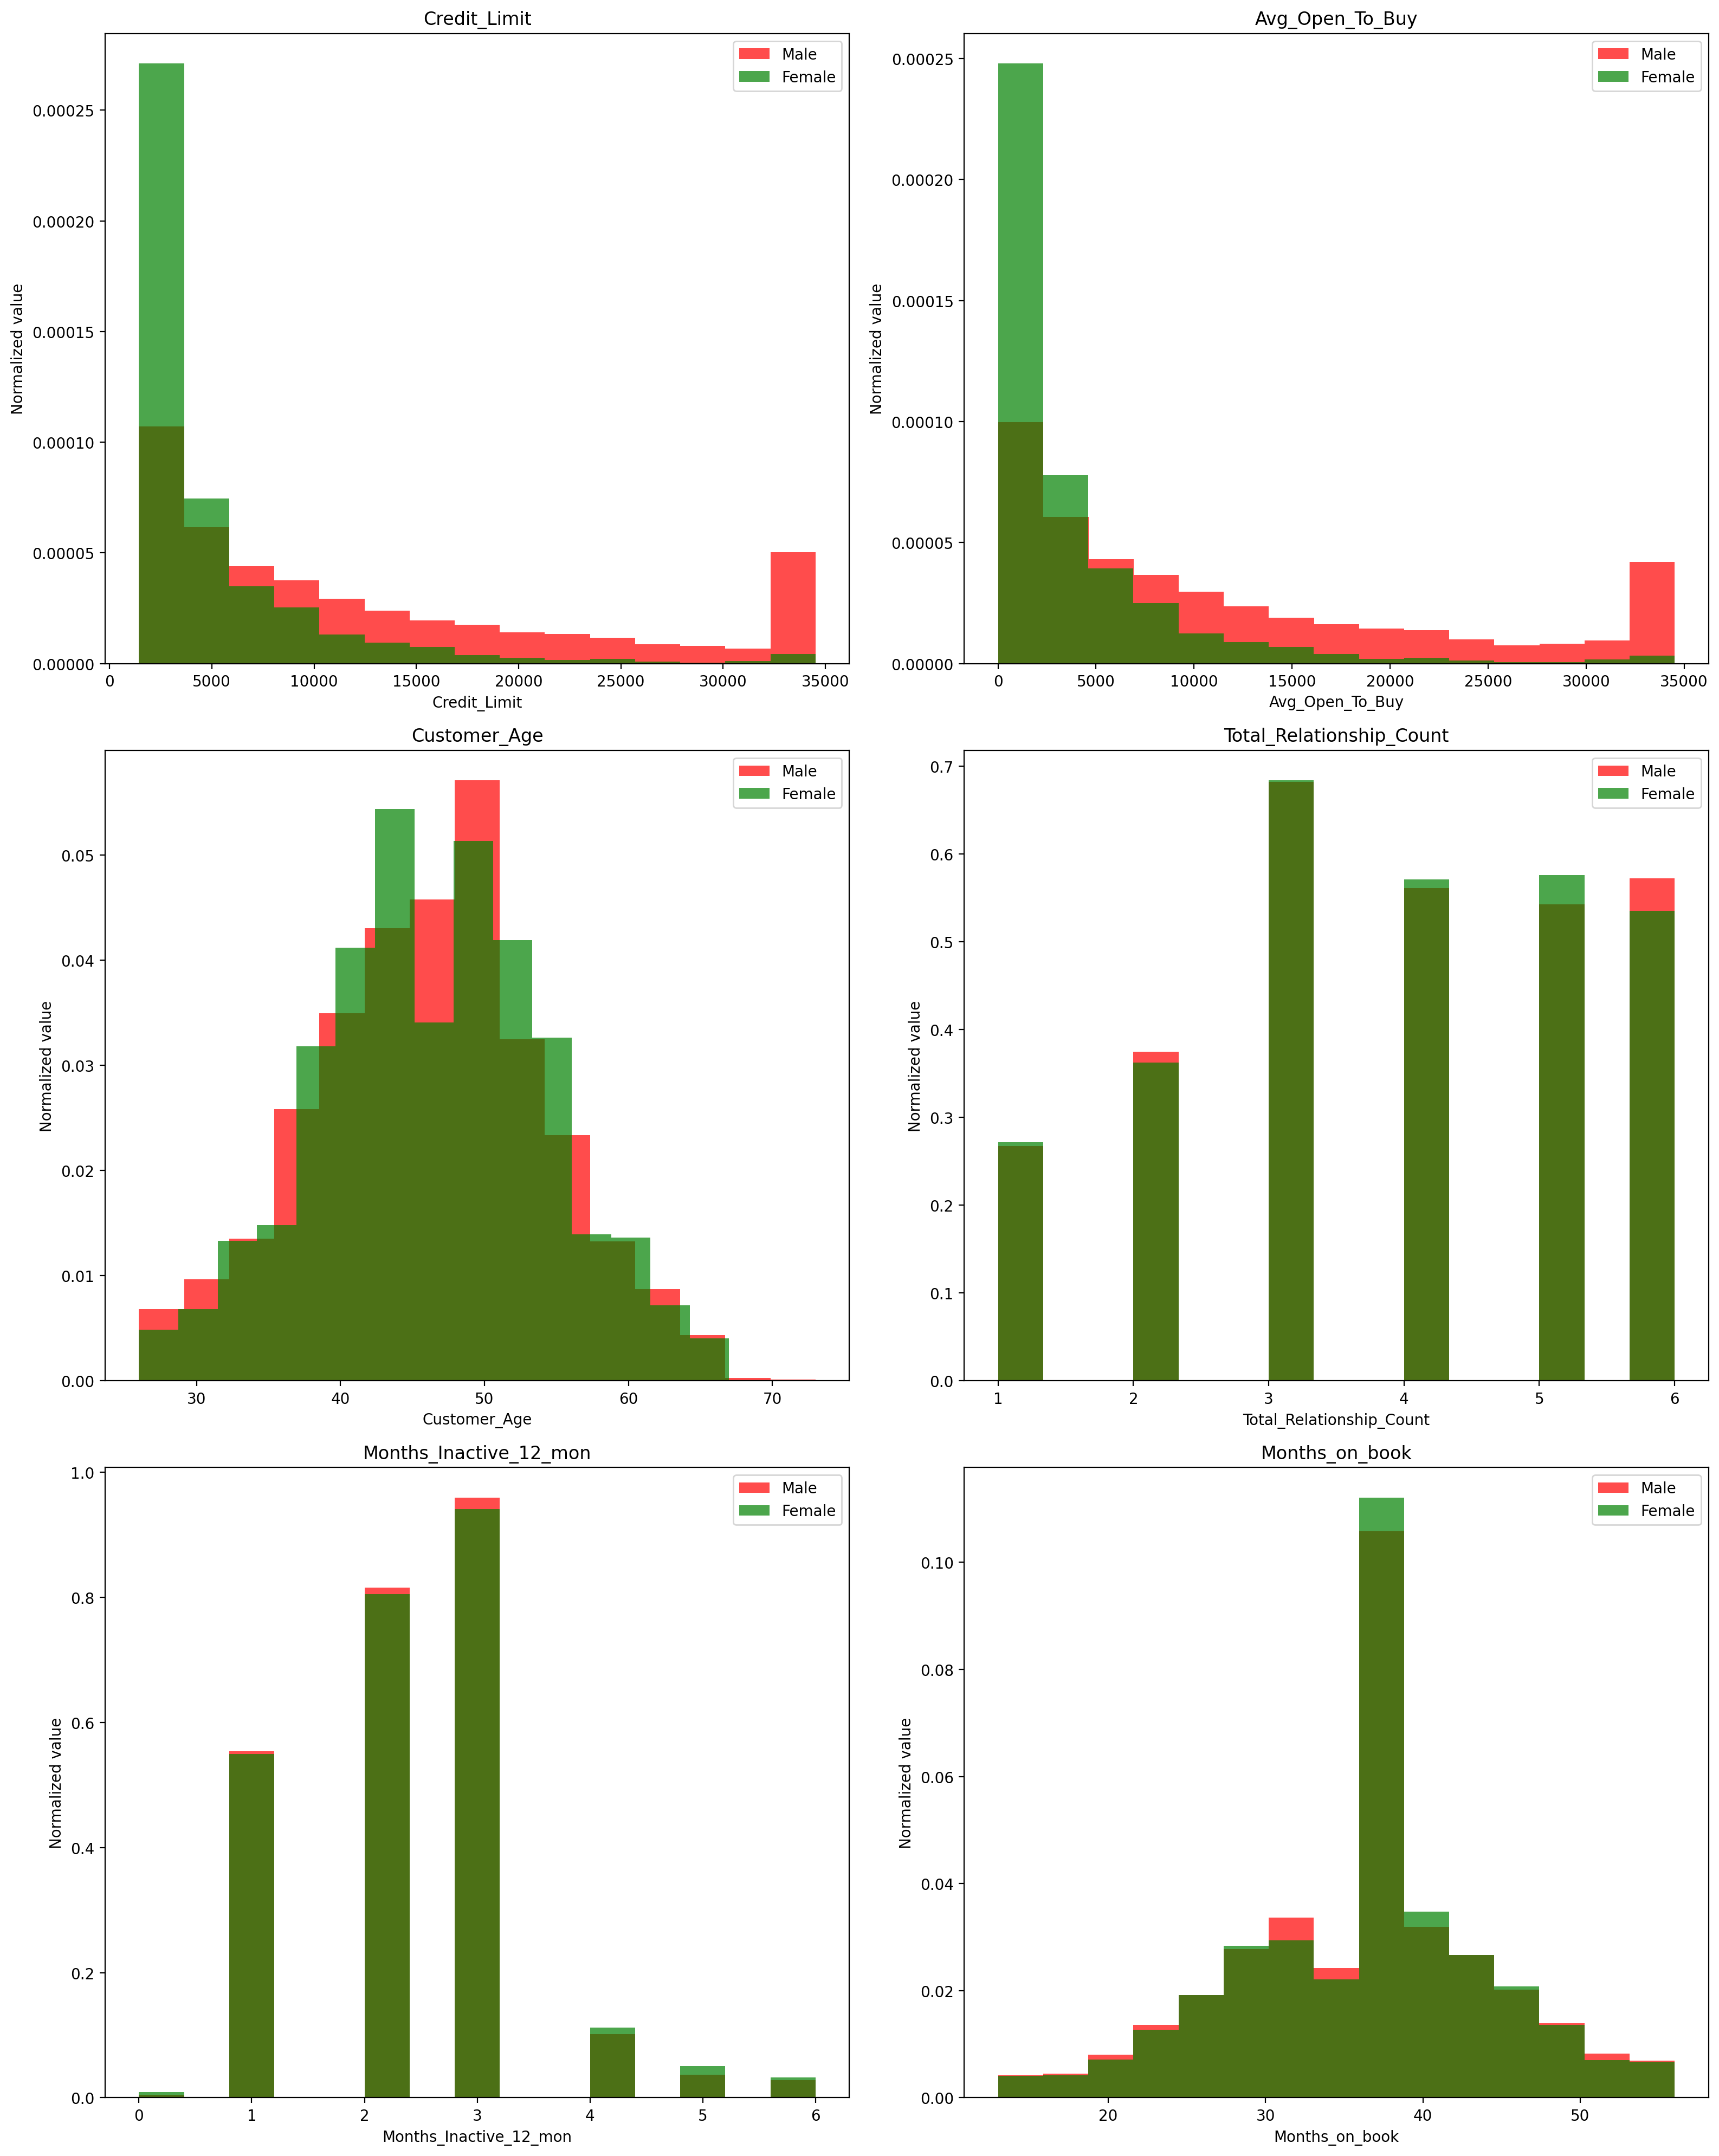

In [14]:
desired_columns = ['Credit_Limit', 'Avg_Open_To_Buy', 'Customer_Age',
                   'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Months_on_book']

fig, axs = plt.subplots(3, 2, figsize=(16, 20), dpi=200)

for i, ax in enumerate(axs.flatten()):
    label = desired_columns[i]
    ax.hist(df[df['Gender'] == 'M'][label], color='red', label="Male",
            alpha=0.7, density=True, bins=15)
    ax.hist(df[df['Gender'] == 'F'][label], color='green', label="Female",
            alpha=0.7, density=True, bins=15)
    ax.set_title(label)
    ax.set_ylabel("Normalized value")
    ax.set_xlabel(label)
    ax.legend()

plt.tight_layout()
plt.show()

### Clustering using scikit-learn

Let's redo it again, but this time using the scikit-learn package:


In [15]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.30969008 0.44760884 ... 0.44768424 0.58732879 0.4366317 ]
 [0.30969008 0.         0.48070254 ... 0.45579718 0.69352515 0.49433702]
 [0.44760884 0.48070254 0.         ... 0.42455162 0.56288091 0.58962358]
 ...
 [0.44768424 0.45579718 0.42455162 ... 0.         0.35882678 0.40493891]
 [0.58732879 0.69352515 0.56288091 ... 0.35882678 0.         0.6015566 ]
 [0.4366317  0.49433702 0.58962358 ... 0.40493891 0.6015566  0.        ]]


In [16]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

In [17]:
Z_using_dist_matrix

array([[3.34300000e+03, 5.73500000e+03, 0.00000000e+00, 2.00000000e+00],
       [7.99600000e+03, 8.04500000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.27200000e+03, 6.08200000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.02380000e+04, 2.02390000e+04, 6.17784302e+01, 9.01000000e+02],
       [2.02460000e+04, 2.02490000e+04, 6.66677257e+01, 9.22600000e+03],
       [2.02500000e+04, 2.02510000e+04, 1.08054530e+02, 1.01270000e+04]])

### Plotting dendrogram

A *dendrogram* is a tree-like diagram commonly used in *hierarchical clustering analysis* to illustrate the arrangement and grouping of objects or samples based on their similarity or dissimilarity. It visually represents the *hierarchical relationships* between data points, displaying how they cluster and merge together as the analysis progresses. In a dendrogram, the objects or samples are represented by the leaves or terminal nodes of the tree-like structure. The branches and nodes of *the dendrogram* depict the clustering hierarchy. The height or length of the branches reflects the dissimilarity between clusters or individual data points. The longer the branch, the greater the dissimilarity.

<br>

*The dendrogram* starts with individual data points as separate clusters and progressively merges them based on their similarity or distance. The process continues until all the data points are merged into a single cluster at the root of *the dendrogram*. Dendrograms are commonly used to assist in identifying the optimal number of clusters within a dataset by visually inspecting the structure of *the dendrogram*. The height at which clusters merge can indicate the dissimilarity threshold for forming distinct clusters. This information helps in making decisions about the appropriate number of clusters to consider for subsequent analysis or interpretation.

<br>

Dendrograms are useful not only in clustering analysis but also in other fields such as *biology, taxonomy, and data visualization*, where hierarchical relationships need to be displayed and analyzed. They provide a concise and informative representation of hierarchical clustering results, aiding in the understanding and interpretation of complex data structures.

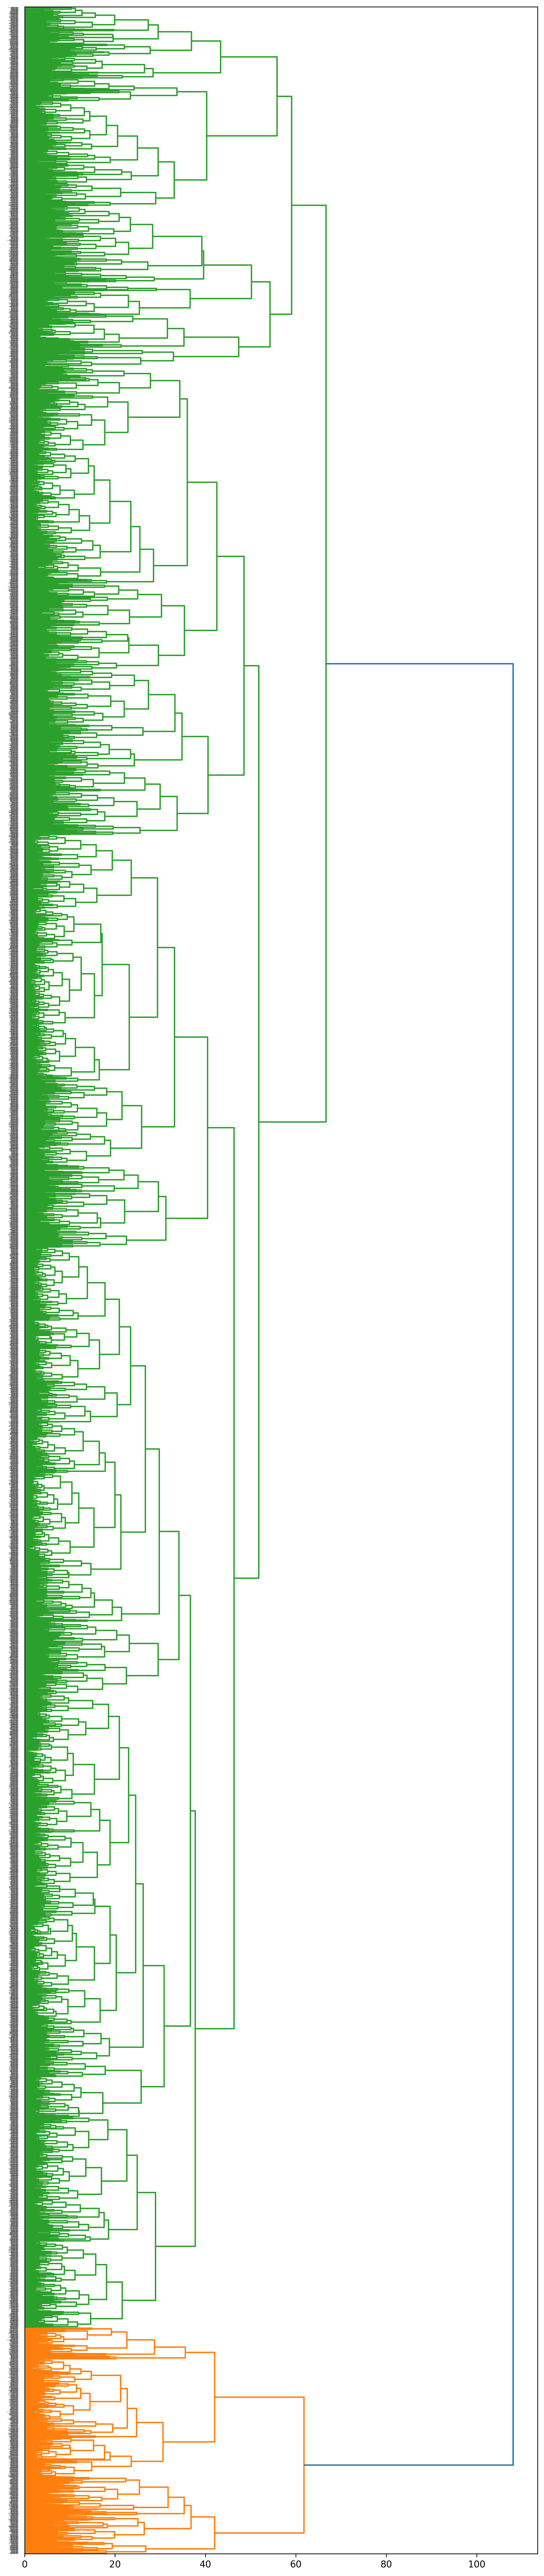

In [18]:
import scipy
import pylab

fig = pylab.figure(figsize=(10, 50), dpi=300)
def llf(id):
    return '[%s %s]' % (df['Education_Level'][id], df['Card_Category'][id])

dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=1, orientation = 'right')

Now, we can use the `AgglomerativeClustering` function from scikit-learn library to cluster the dataset. The `AgglomerativeClustering` performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

*   Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
*   Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
*   Average linkage minimizes the average of the distances between all observations of pairs of clusters.


In [19]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=6, linkage='complete')
agglom.fit(dist_matrix)

agglom.labels_

array([2, 2, 2, ..., 2, 2, 5])

We can add a new field to our dataframe to show the cluster of each row:


In [20]:
df['cluster_'] = agglom.labels_
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                         5  ...                      3       12691.0   
1                         6  ...                      2        8256.0   
2                         4  ...                      0        3418.0   
3                         3  ...                      1        3313.0   
4                         5  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  cluster_  
0                  0.061         2  
1                  0.105         2  
2                  0.000         2  
3                  0.760         2  
4                  0.000         5  

[5 rows x 21 columns]

Text(0, 0.5, 'Customer Age')

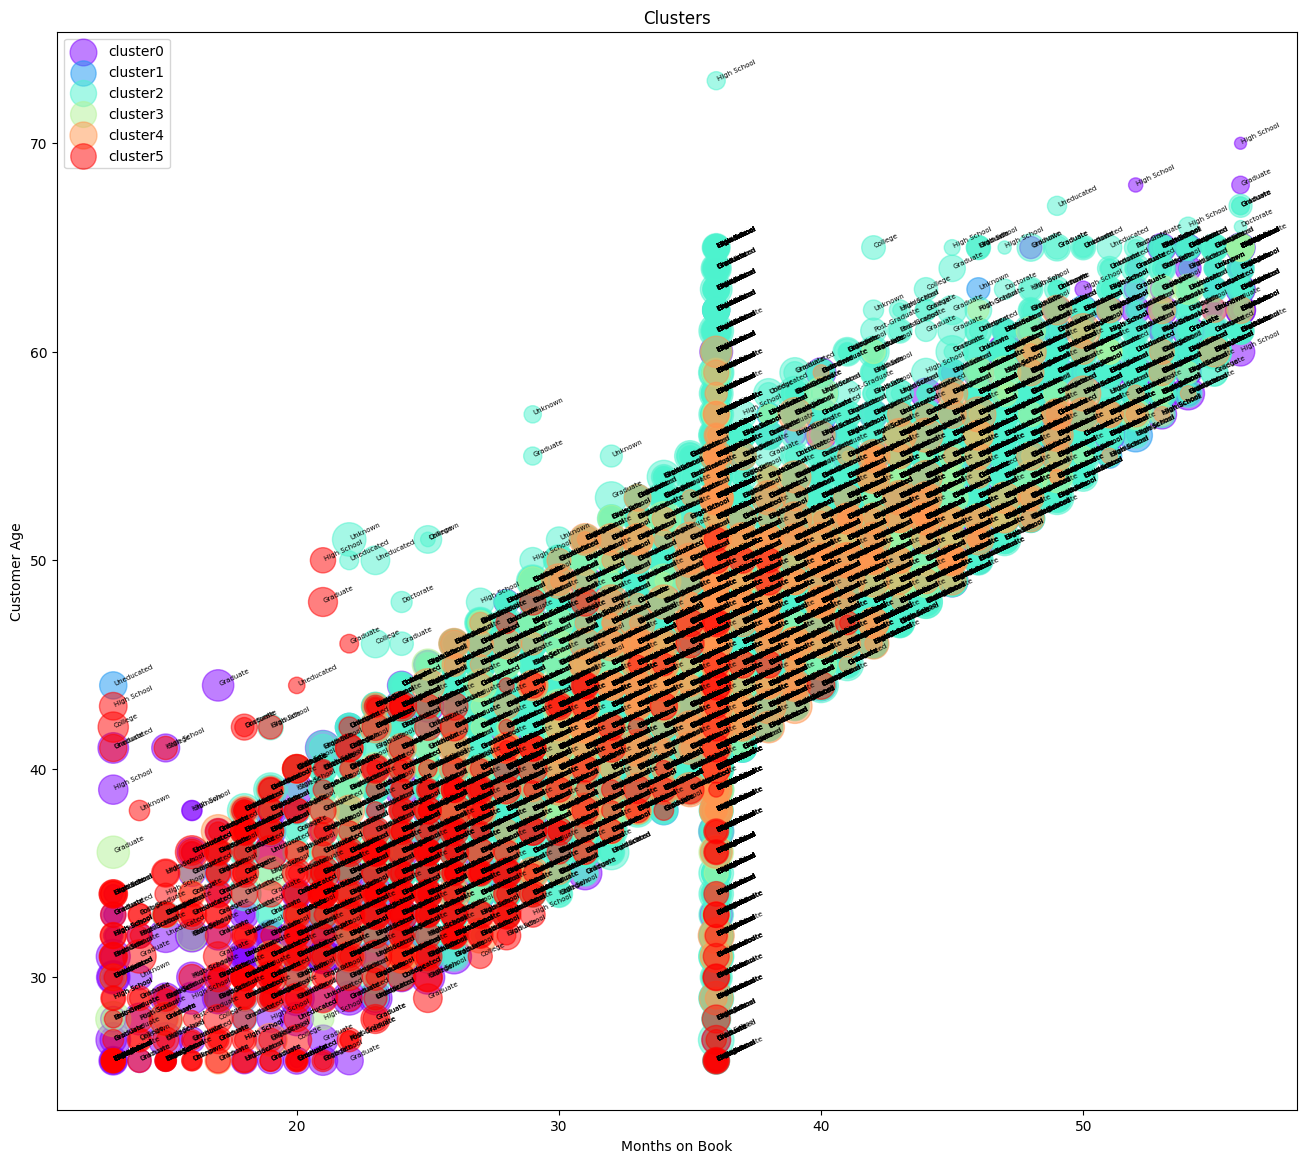

In [21]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
        plt.text(subset.Months_on_book[i], subset.Customer_Age[i], str(subset['Education_Level'][i]), rotation=25, fontsize=5)
    plt.scatter(subset.Months_on_book, subset.Customer_Age, s=subset.Total_Trans_Ct*5, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Months on Book')
plt.ylabel('Customer Age')

After applying label encoding to spesified column, the `encoder.classes_` attribute is used to retrieve the unique categories in each column, and `encoder.transform(encoder.classes_)` is used to get the corresponding encoded values.

Using encoder for all columns:

In [22]:
# For all columns

# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# for column in df.columns:
#     if df[column].dtype == 'object' or df[column].dtype.name == 'category':
#         df[column] = encoder.fit_transform(df[column])
#         print(f"Column: {column}")
#         for category, value in zip(encoder.classes_, encoder.transform(encoder.classes_)):
#             print(f"Category: {category}, Encoded Value: {value}")
#         print("-" * 50)

Using encoder for spesific columns:

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

columns = ['Attrition_Flag', 'Education_Level', 'Marital_Status', 'Income_Category']

for column in columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        df[column] = encoder.fit_transform(df[column])
        print(f"Column: {column}")
        for category, value in zip(encoder.classes_, encoder.transform(encoder.classes_)):
            print(f"Category: {category}, Encoded Value: {value}")
        print("-" * 50)

Column: Attrition_Flag
Category: Attrited Customer, Encoded Value: 0
Category: Existing Customer, Encoded Value: 1
--------------------------------------------------
Column: Education_Level
Category: College, Encoded Value: 0
Category: Doctorate, Encoded Value: 1
Category: Graduate, Encoded Value: 2
Category: High School, Encoded Value: 3
Category: Post-Graduate, Encoded Value: 4
Category: Uneducated, Encoded Value: 5
Category: Unknown, Encoded Value: 6
--------------------------------------------------
Column: Marital_Status
Category: Divorced, Encoded Value: 0
Category: Married, Encoded Value: 1
Category: Single, Encoded Value: 2
Category: Unknown, Encoded Value: 3
--------------------------------------------------
Column: Income_Category
Category: $120K +, Encoded Value: 0
Category: $40K - $60K, Encoded Value: 1
Category: $60K - $80K, Encoded Value: 2
Category: $80K - $120K, Encoded Value: 3
Category: Less than $40K, Encoded Value: 4
Category: Unknown, Encoded Value: 5
-------------

Now we can look at the characteristics of each cluster:


In [32]:
param = 'Education_Level' #@param ['Attrition_Flag', 'Education_Level', 'Marital_Status', 'Income_Category']

agg_card = df.groupby(['cluster_', param])['Credit_Limit', 'Avg_Open_To_Buy', 'Customer_Age',
                   'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Months_on_book'].mean()
agg_card

Credit_Limit  Avg_Open_To_Buy  Customer_Age  \
cluster_ Education_Level                                                
0        0                12776.198333     11697.265000     47.616667   
         1                15148.937037     14023.862963     48.777778   
         2                11311.432609     10189.405435     48.478261   
         3                12108.608943     10888.869106     46.032520   
         4                11292.400000     10288.400000     43.763158   
         5                11985.046392     10846.963918     46.979381   
         6                10920.223009      9683.718584     46.044248   
1        0                19889.956522     18795.695652     45.826087   
         1                20394.416667     18966.666667     49.000000   
         2                19646.136364     18569.329545     45.522727   
         3                19490.595745     18331.255319     46.787234   
         4                19884.750000     18675.687500     44.437500   
         5                20720.156863     19503.490196     47.784314   
         6                20152.551020     18914.346939     48.000000   
2        0                 5323.707881      4176.480491     46.612403   
         1                 5222.336639      4155.116253     47.484848   
         2                 5494.850620      4328.674174     46.966942   
         3                 5532.297761      4335.149968     47.081254   
         4                 5517.783854      4339.424479     46.648438   
         5                 5616.688380      4461.767606     47.027289   
         6                 5205.128794      4066.612749     47.269731   
3        0                27740.647059     26578.676471     46.852941   
         1                29306.769231     27932.461538     48.615385   
         2                28042.235294     26863.011765     45.352941   
         3                27860.705882     26808.852941     46.117647   
         4                28052.882353     26933.823529     47.470588   
         5                27938.204545     26755.159091     48.000000   
         6                27245.695652     26118.260870     45.239130   
4        0                34329.406250     33261.265625     46.671875   
         1                34324.478261     33029.000000     46.260870   
         2                34197.677249     33034.296296     46.899471   
         3                34259.855856     33016.504505     47.036036   
         4                34380.516129     33016.806452     46.419355   
         5                34219.617978     33110.168539     45.539326   
         6                34232.172414     32894.850575     44.988506   
5        0                 5389.315517      4271.677586     34.465517   
         1                 5728.176923      4892.869231     36.692308   
         2                 5185.867901      3997.886420     34.537037   
         3                 5680.717822      4502.143564     34.524752   
         4                 5476.333333      4091.200000     32.566667   
         5                 5127.248571      3971.720000     35.000000   
         6                 6261.519718      5114.928169     34.830986   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
cluster_ Education_Level                                                     
0        0                                2.700000                2.483333   
         1                                2.814815                2.481481   
         2                                2.652174                2.641304   
         3                                2.585366                2.544715   
         4                                2.421053                2.552632   
         5                                2.618557                2.515464   
         6                                2.699115                2.433628   
1        0                                5.521739                2.260870   
         1                       

In [33]:
df.to_csv('BankChruners_clustered.csv', index=False)

In [27]:
# !pip freeze > requirements.txt

## Contact Me
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [28]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-07-06 14:38:17
